In [3]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt

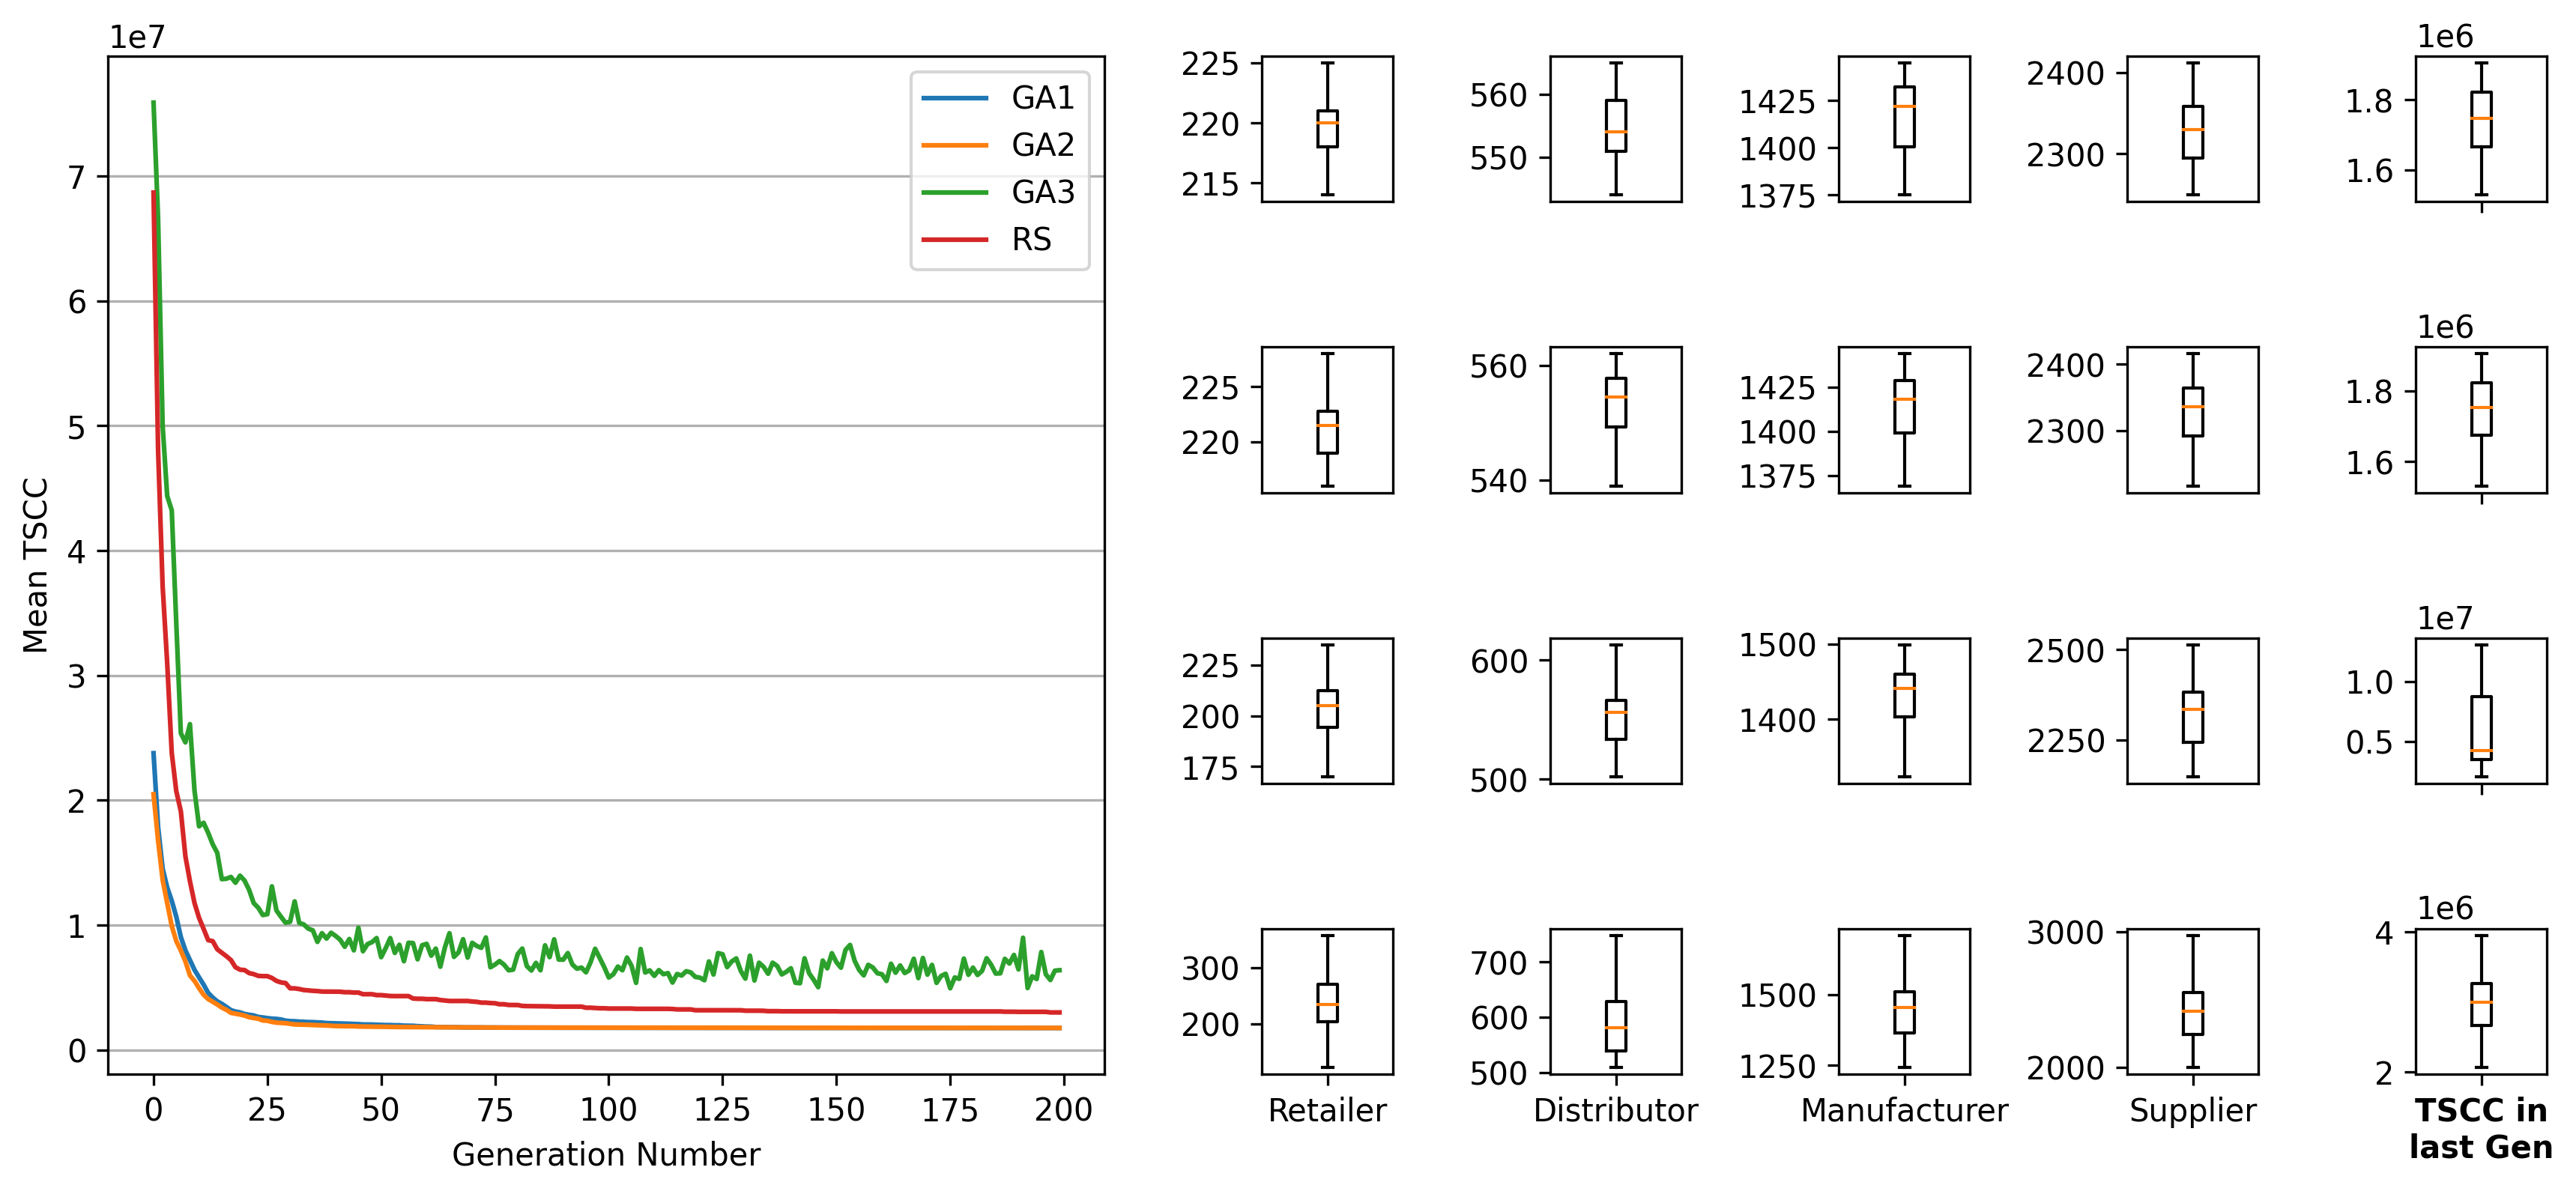

In [23]:
s = "s4"
filename = ["GA1/GA1_{}".format(s), "GA2/GA2_{}".format(s),
            "GA3/GA3_{}".format(s), "RS/RS_{}".format(s)]
file_out = ["GA1", "GA2", "GA3", "RS"]

history_last_list = []
tscc_list = []
tscc_last_list = []
stock_levels = []
tscc_means = []

for GA in filename:
    tscc = pd.read_csv(GA+"_tscc.csv", index_col="Unnamed: 0")
    tscc_last = tscc.iloc[-1,:].values.tolist()
    tscc_list.append(tscc)
    tscc_last_list.append(tscc_last)
    tscc_means.append(tscc['Mean'])

In [ ]:
"""# Boxplot
fig = plt.figure(figsize=(12, 3), dpi=300)
gs = fig.add_gridspec(ncols=4, nrows=1)
for i in range(4):
    ax = fig.add_subplot(gs[0,i])
    ax.boxplot(tscc_last_list[i], showfliers=False)
    ax.set_xticklabels([file_out[i]])
    ax.grid(axis='y')
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.subplots_adjust(wspace=0.5)
plt.savefig("plots/{}_tscc.png".format(s), dpi=300)
"""

In [ ]:
means = pd.concat(tscc_means, axis=1)
means.columns = file_out

fig = plt.figure(figsize=(14, 6), dpi=300)
gs = fig.add_gridspec(ncols=9, nrows=4)

ax1 = fig.add_subplot(gs[0:4,0:4])
ax1.plot(means)
ax1.legend(file_out)
ax1.grid(axis='y')
ax1.set_ylabel("Mean TSCC")
ax1.set_xlabel("Generation Number")
ax1.set_aspect

for GA in filename:
    history = pd.read_csv(GA+"_history.csv", index_col="Unnamed: 0")
    history_last = history.iloc[-1,:].values.tolist()
    history_last = [literal_eval(x)['CHROM'] for x in history_last]
    history_last_list.append(history_last)
    last_levels = []
    for i in range(4):
        last_levels.append([x[i] for x in history_last])
    stock_levels.append(last_levels)

agents = ['Retailer', 'Distributor', 'Manufacturer', 'Supplier']
for i in range(4):

    axR = fig.add_subplot(gs[i, 0+4])
    axR.boxplot(stock_levels[i][0], showfliers=False)
    if i != 3:
        axR.set_xticklabels([""])
        axR.set_xticks([])
    else:
        axR.set_xticklabels([agents[0]])

    axD = fig.add_subplot(gs[i, 1+4])
    axD.boxplot(stock_levels[i][1], showfliers=False)
    if i != 3:
        axD.set_xticklabels([""])
        axD.set_xticks([])
    else:
        axD.set_xticklabels([agents[1]])

    axM = fig.add_subplot(gs[i, 2+4])
    axM.boxplot(stock_levels[i][2], showfliers=False)
    if i != 3:
        axM.set_xticklabels([""])
        axM.set_xticks([])
    else:
        axM.set_xticklabels([agents[2]])

    axS = fig.add_subplot(gs[i, 3+4])
    axS.boxplot(stock_levels[i][3], showfliers=False)
    if i != 3:
        axS.set_xticklabels([""])
        axS.set_xticks([])
    else:
        axS.set_xticklabels([agents[3]])

    plt.subplots_adjust(wspace=1.2, hspace=1)

for i in range(4):
    ax = fig.add_subplot(gs[i,8])
    ax.boxplot(tscc_last_list[i], showfliers=False)
    ax.set_xticklabels([""])
    if i==3:
        ax.set_xticklabels(["TSCC in\nlast Gen"], weight="bold")
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

# plt.savefig("levels.png", dpi=300)
plt.savefig("plots/{}.png".format(s), dpi=300)